# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from matplotlib.colors import LogNorm

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



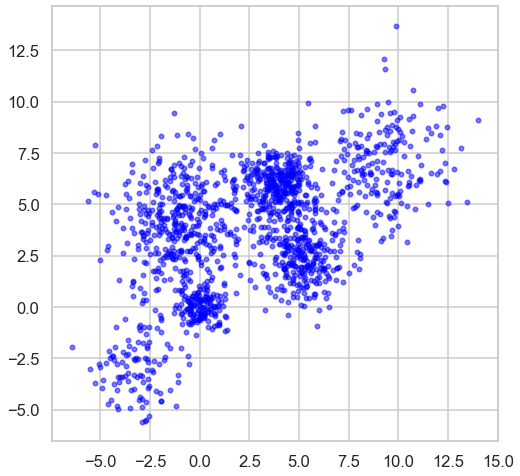

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [4]:
X = Multi_blob_Data

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
def calculate_distortion(X, cluster_centers, d_type = 'euclidean'):
    
    dist = sum(np.min(cdist(X, cluster_centers, d_type), axis=1)) 
    return dist / X.shape[0]

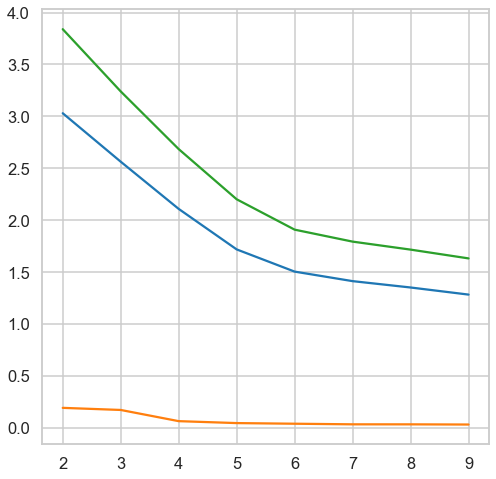

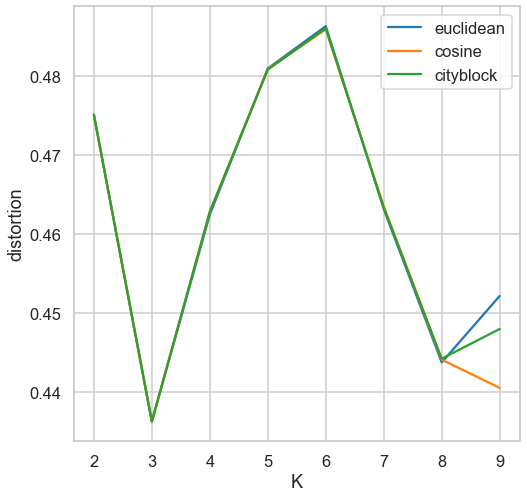

In [19]:
max_k = 10


distance_metrics = ['euclidean', 'cosine', 'cityblock']

fig,ax_distortion = plt.subplots()
fig,ax_silh = plt.subplots()


for dm in distance_metrics:
    distortions = []
    silhouette_scores = []
    
    for k in range(2,max_k):
        kmeans_model = KMeans(k).fit(X)

        clusters = kmeans_model.labels_


        distortions.append(calculate_distortion(X, kmeans_model.cluster_centers_, d_type=dm))

        silhouette_scores.append(silhouette_score(X, clusters))

        
    ax_distortion.plot(range(2,max_k), distortions, label = dm)
    ax_silh.plot(range(2,max_k), silhouette_scores, label = dm)
    plt.xlabel('K')
    plt.ylabel('distortion')
plt.legend()
plt.show()


We can see that all 3 distances gave the same optimal K which is 6 or 5

In [20]:
Kmeans_best_silhouette = max(silhouette_scores)
Kmeans_best_silhouette

0.48609303184118463

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

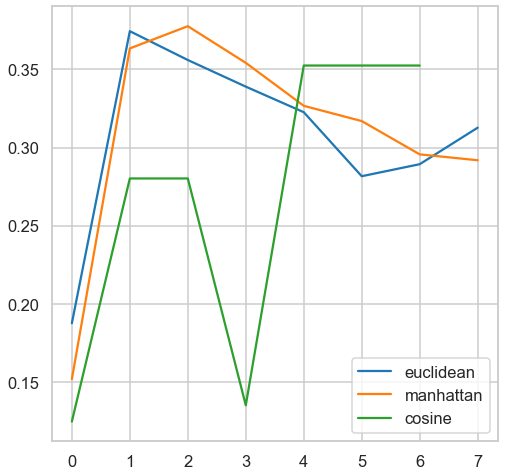

In [31]:
max_D = 2


Ds = np.arange(0.1, max_D,0.25)

affin = ["euclidean", "manhattan", "cosine"]

for a in affin:
    silhouette_scores = []

    for d in Ds:
        hierar_model = AgglomerativeClustering(n_clusters= None,
                                               distance_threshold = d,
                                               linkage="average",
                                               affinity=a)
        
        hierar_model.fit(X)

        clusters = hierar_model.labels_
        
        if len(set(clusters)) <= 1:
            continue
        silhouette_scores.append(silhouette_score(X, clusters))
        
    plt.plot(np.arange(len(silhouette_scores)), silhouette_scores, label = a)
    
plt.legend()
plt.show()


The euclidean gave the highest silhoutte score

We can see that **n_components = 5** was a good choice as there are almost 5 clusters in the dataset